---
layout: default
title: karplus strong
author: spielhuus
tags: documentation
---

# Karplus-Strong Synthesis

calculating frequencies from midi notes:

In [1]:
def make_sine_wavetable(n_samples, amps, phases, freqs):
    """Makes a wavetable from a sum of sines."""
    t = np.linspace(0, 1, num=n_samples)
    wavetable = np.zeros_like(t)
    for amp, phase, freq in zip(amps, 
                                phases,
                                freqs):
        wavetable += amp * np.sin(np.sin(2 * np.pi * freq * t + phase)) + \
                         amp / 2 * np.sin(np.sin(2 * np.pi * 2 * freq * t + phase))
    return wavetable

In [2]:
def make_triangle_wavetable():
    t = np.linspace(0, 1, num=n_samples)
    
    return wavetable

In [3]:
import numpy as np
import matplotlib.pyplot as plot
from IPython.display import Audio

In [4]:
fs = 8000
wavetable_size = fs // 55
wavetable = (2 * np.random.randint(0, 2, wavetable_size) - 1).astype(np.float)

calculate sine wave with cmsis dsp. 


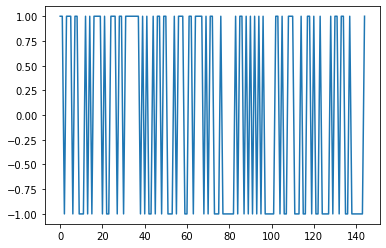

In [5]:
plot.plot(wavetable)


In [6]:
Audio(wavetable, rate=fs)

In [7]:
def karplus_strong(wavetable, n_samples):
    """Synthesizes a new waveform from an existing wavetable, modifies last sample by averaging."""
    samples = []
    current_sample = 0
    previous_value = 0
    while len(samples) < n_samples:
        wavetable[current_sample] = 0.5 * (wavetable[current_sample] + previous_value)
        samples.append(wavetable[current_sample])
        previous_value = samples[-1]
        current_sample += 1
        current_sample = current_sample % wavetable.size
    return np.array(samples)

In [8]:
sample1 = karplus_strong(wavetable, 2 * fs)
Audio(sample1, rate=8000)

# drums


In [9]:
def karplus_strong_drum(wavetable, n_samples, prob):
    """Synthesizes a new waveform from an existing wavetable, modifies last sample by averaging."""
    samples = []
    current_sample = 0
    previous_value = 0
    while len(samples) < n_samples:
        r = np.random.binomial(1, prob)
        sign = float(r == 1) * 2 - 1
        wavetable[current_sample] = sign * 0.5 * (wavetable[current_sample] + previous_value)
        samples.append(wavetable[current_sample])
        previous_value = samples[-1]
        current_sample += 1
        current_sample = current_sample % wavetable.size
    return np.array(samples)

In [10]:
wavetable_size = fs // 40 
wavetable = np.ones(wavetable_size)

In [11]:
sample1 = karplus_strong_drum(wavetable, 1 * fs, 0.3)

In [12]:
Audio(sample1, rate=fs)

In [13]:
bs = np.arange(0, 1.1, 0.1)

In [14]:
for b in bs:
    wavetable = np.ones(wavetable_size)
    sample = karplus_strong_drum(wavetable, 1 * fs, b)
    display(Audio(sample, rate=fs))

In [15]:
fs = 20000
for freq in [20, 55, 110, 220, 440, 880, 1288]:
    wavetable_size = fs // freq 
    wavetable = np.ones(wavetable_size)
    sample = karplus_strong_drum(wavetable, 2 * fs, 0)
    display(Audio(sample, rate=fs))

In [16]:
## Modifying the algorithm for longer delays

In [17]:
def karplus_strong_decay(wavetable, n_samples, stretch_factor):
    """Synthesizes a new waveform from an existing wavetable, modifies last sample by averaging.
    Uses a stretch_factor to control for decay."""
    samples = []
    current_sample = 0
    previous_value = 0
    while len(samples) < n_samples:
        r = np.random.binomial(1, 1 - 1/stretch_factor)
        if r == 0:
            wavetable[current_sample] =  0.5 * (wavetable[current_sample] + previous_value)
        samples.append(wavetable[current_sample])
        previous_value = samples[-1]
        current_sample += 1
        current_sample = current_sample % wavetable.size
    return np.array(samples)

In [18]:
fs = 8000

In [19]:
stretch_factors = [1, 2.1, 3.5, 4, 8]

In [20]:
freq = 110

In [21]:
waveforms = []
for ind, stretch_factor in enumerate(stretch_factors):
    wavetable_size = fs // int(freq)
    wavetable = (2 * np.random.randint(0, 2, wavetable_size) - 1).astype(np.float)
    sample = karplus_strong_decay(wavetable, 2 * fs, stretch_factor)
    waveforms.append(sample)

In [22]:
for waveform in waveforms:
    display(Audio(waveform, rate=fs))

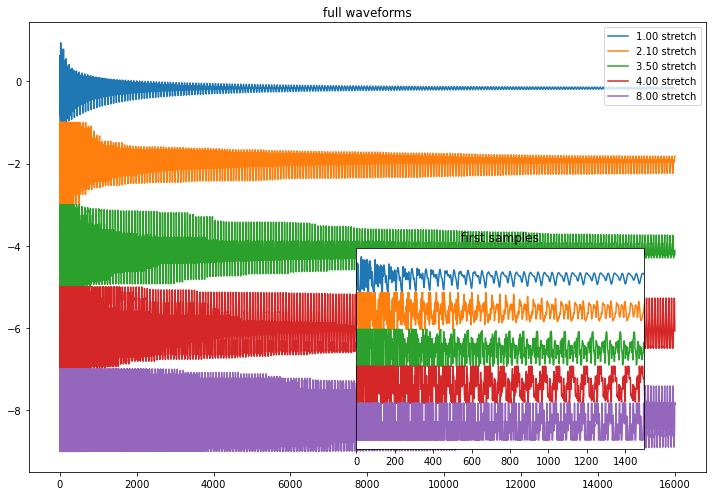

In [23]:
plot.figure(figsize=(10, 7))
for ind, (waveform, stretch_factor) in enumerate(zip(waveforms, stretch_factors)):
    plot.plot(waveform - 2 * ind, label='{:.2f} stretch'.format(stretch_factor))
plot.legend(loc='upper right')
plot.title('full waveforms')

a = plot.axes([.5, .1, .4, .4], facecolor='white')
plot.yticks([])
for ind, (waveform, stretch_factor) in enumerate(zip(waveforms, stretch_factors)):
    plot.plot(waveform - 2 * ind, label='{:.2f} stretch'.format(stretch_factor))
plot.xlim(0, 1500)
plot.title('first samples')
plot.tight_layout()

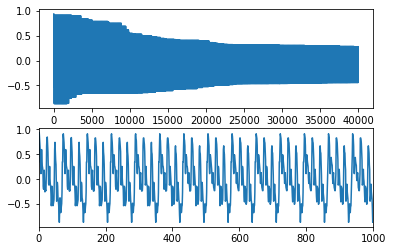

In [24]:
wavetable_size = fs // int(freq)
wavetable = make_sine_wavetable(wavetable_size, [0.3, 0.5, 0.3], [0, 0.5, 0], [1, 3, 9])
sample = karplus_strong_decay(wavetable, 5 * fs, stretch_factor=10)
plot.subplot(211)
plot.plot(sample)
plot.subplot(212)
plot.plot(sample)
plot.xlim(0, 1000)

Audio(sample, rate=fs)

## references

* [Kevin Karplus, Alex Strong](https://users.soe.ucsc.edu/~karplus/papers/digitar.pdf) Digital Synthesis of Plucked-String and Drum Timres
